In [5]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def poisson_2d():
    size = 64
    x = np.random.rand(size,size)

    x[[-1,0],:] = 0 # boundary conditions
    x[:,[-1,0]] = 0

    for i in range(1000): # number of iterations
        x = gauss_seidel(x)


def gauss_seidel(f):
    newf = f.copy()

    # newf[1:-1, 1:-1] = 0.25 * (np.roll(newf, 1, axis=0)[1:-1, 1:-1] +  # right
    #                         np.roll(newf, -1, axis=0)[1:-1, 1:-1] + # left
    #                         np.roll(newf, 1, axis=1)[1:-1, 1:-1] +  # down
    #                         np.roll(newf, -1, axis=1)[1:-1, 1:-1])  # up


    for i in range(1,newf.shape[0]-1):
        for j in range(1,newf.shape[1]-1):
            newf[i,j] = 0.25 * (newf[i,j+1] + newf[i,j-1] +
                                   newf[i+1,j] + newf[i-1,j])

    return newf



size = [8,16,32,64,128,256,512]
duration = []

for s in size:
  x = np.random.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  t1 = timer()
  for i in range(1000): # number of iterations
      x = gauss_seidel(x)
  t2 = timer()
  print(f'{t2-t1} sec, grid size is: {s}')

  duration.append(t2-t1)



0.0725926420000178 sec, grid size is: 8
0.230877200000009 sec, grid size is: 16
1.2688224919999698 sec, grid size is: 32
4.740534098000012 sec, grid size is: 64
15.817535529999986 sec, grid size is: 128
66.27439897 sec, grid size is: 256
280.40698600900004 sec, grid size is: 512


In [6]:
size = [8,16,32,64,128,256,512]

Text(0.5, 1.0, 'Performance evaluation for varying grid sizes using python')

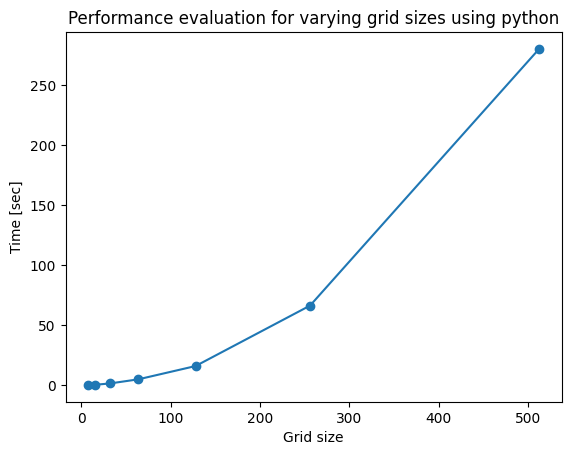

In [7]:
plt.plot(size, duration, linestyle="-", marker="o")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes using python")

In [8]:
def poisson_2d():
    size = 64
    x = np.random.rand(size,size)

    x[[-1,0],:] = 0 # boundary conditions
    x[:,[-1,0]] = 0

    for i in range(1000): # number of iterations
        x = gauss_seidel(x)


def gauss_seidel(f):
    newf = f.copy()

    newf[1:-1, 1:-1] = 0.25 * (np.roll(newf, 1, axis=0)[1:-1, 1:-1] +  # right
                            np.roll(newf, -1, axis=0)[1:-1, 1:-1] + # left
                            np.roll(newf, 1, axis=1)[1:-1, 1:-1] +  # down
                            np.roll(newf, -1, axis=1)[1:-1, 1:-1])  # up

    return newf



size_np = [8,16,32,64,128,256,512,1024,2048]
duration_np = []

for s in size_np:
  x = np.random.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  t1 = timer()
  for i in range(1000): # number of iterations
      x = gauss_seidel(x)
  t2 = timer()
  print(f'{t2-t1} sec, grid size is: {s}')

  duration_np.append(t2-t1)

0.04565617800005839 sec, grid size is: 8
0.058418103999997584 sec, grid size is: 16
0.0648400689999562 sec, grid size is: 32
0.07547629200007577 sec, grid size is: 64
0.14792193300002054 sec, grid size is: 128
0.558252158000073 sec, grid size is: 256
5.21508139499997 sec, grid size is: 512
17.421296083000016 sec, grid size is: 1024
86.84888606899995 sec, grid size is: 2048


Text(0.5, 1.0, 'Performance evaluation for varying grid sizes using numpy')

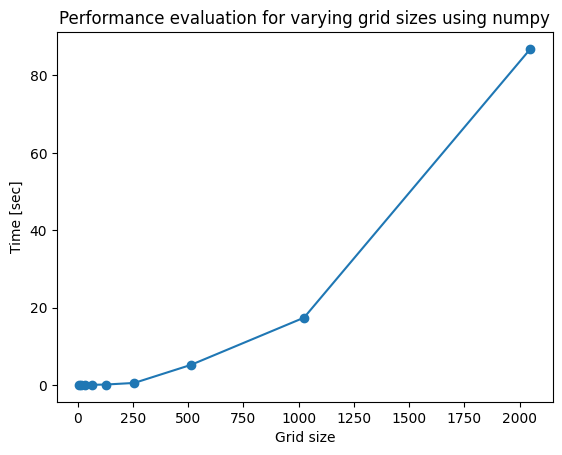

In [9]:
plt.plot(size_np, duration_np, linestyle="-", marker="o")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes using numpy")

In [10]:
import torch

def poisson_2d():
    size = 64
    x = np.random.rand(size,size)

    x[[-1,0],:] = 0 # boundary conditions
    x[:,[-1,0]] = 0

    for i in range(1000): # number of iterations
        x = gauss_seidel(x)


def gauss_seidel(f):
    newf = torch.clone(f)

    newf[1:-1, 1:-1] = 0.25 * (torch.roll(newf, 1, dims=0)[1:-1, 1:-1] +  # right
                            torch.roll(newf, -1, dims=0)[1:-1, 1:-1] + # left
                            torch.roll(newf, 1, dims=1)[1:-1, 1:-1] +  # down
                            torch.roll(newf, -1, dims=1)[1:-1, 1:-1])  # up

    return newf



size_torch = [8,16,32,64,128,256,512,1024,2048,4096,8192]
duration_torch = []

for s in size_torch:
  x = torch.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  x = x.cuda()
  t1 = timer()
  for i in range(1000): # number of iterations
      x = gauss_seidel(x)
  t2 = timer()
  print(f'{t2-t1} sec, grid size is: {s}')

  duration_torch.append(t2-t1)

0.24878068099997108 sec, grid size is: 8
0.1374452410000231 sec, grid size is: 16
0.1508324190000394 sec, grid size is: 32
0.13769961299999522 sec, grid size is: 64
0.14353187500000786 sec, grid size is: 128
0.1384184280000227 sec, grid size is: 256
0.14479648500002895 sec, grid size is: 512
0.3962095719999752 sec, grid size is: 1024
1.4634250609999526 sec, grid size is: 2048
5.779681807999964 sec, grid size is: 4096
23.0558676820001 sec, grid size is: 8192


Text(0.5, 1.0, 'Performance evaluation for varying grid sizes using torch')

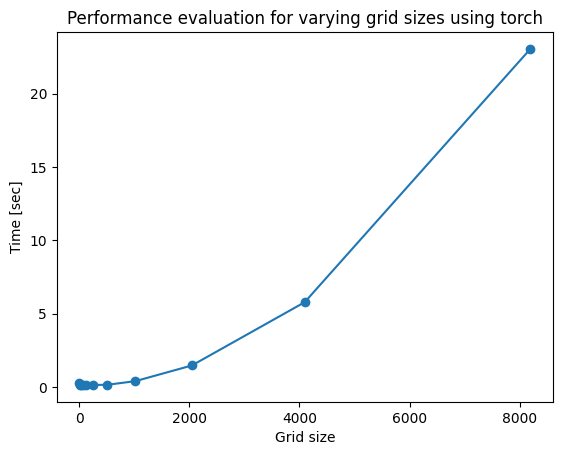

In [11]:
plt.plot(size_torch, duration_torch, linestyle="-", marker="o")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes using torch")

In [12]:
import cupy as cp

def poisson_2d():
    size = 64
    x = cp.random.rand(size,size)

    x[[-1,0],:] = 0 # boundary conditions
    x[:,[-1,0]] = 0

    for i in range(1000): # number of iterations
        x = gauss_seidel(x)


def gauss_seidel(f):
    newf = f.copy()
    # newf_cp = cp.array(newf)
    newf[1:-1, 1:-1] = 0.25 * (cp.roll(newf, 1, axis=0)[1:-1, 1:-1] +  # right
                            cp.roll(newf, -1, axis=0)[1:-1, 1:-1] + # left
                            cp.roll(newf, 1, axis=1)[1:-1, 1:-1] +  # down
                            cp.roll(newf, -1, axis=1)[1:-1, 1:-1])  # up
    # newf = cp.asnumpy(newf_cp)
    return newf



size_cp = [8,16,32,64,128,256,512,1024,2048,4096,8192]
duration_cp = []

for s in size_cp:
  x = cp.random.rand(s,s)

  x[[-1,0],:] = 0 # boundary conditions
  x[:,[-1,0]] = 0

  t1 = timer()
  for i in range(1000): # number of iterations
      x = gauss_seidel(x)

  cp.cuda.Stream.null.synchronize()

  t2 = timer()

  print(f'{t2-t1} sec, grid size is: {s}')

  duration_cp.append(t2-t1)

1.7578191160000642 sec, grid size is: 8
0.42267516099991553 sec, grid size is: 16
0.43613739800002804 sec, grid size is: 32
0.43038216100001137 sec, grid size is: 64
0.43358829700002843 sec, grid size is: 128
0.43304545599994526 sec, grid size is: 256
0.4531428359999836 sec, grid size is: 512
0.8140584569999874 sec, grid size is: 1024
3.158830011999953 sec, grid size is: 2048
12.535023465999984 sec, grid size is: 4096
49.836026109000045 sec, grid size is: 8192


Text(0.5, 1.0, 'Performance evaluation for varying grid sizes using cupy')

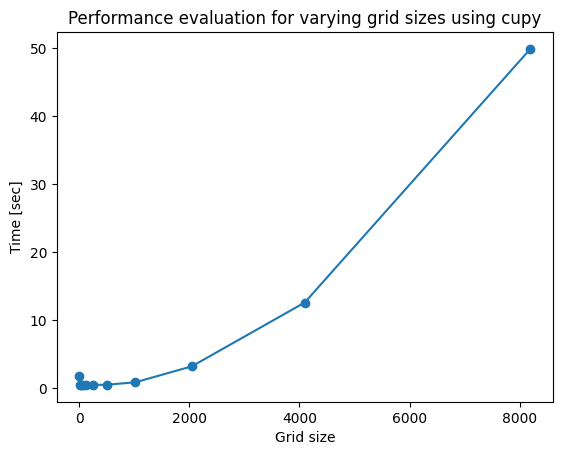

In [13]:
plt.plot(size_cp, duration_cp, linestyle="-", marker="o")
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes using cupy")

Text(0.5, 1.0, 'Performance evaluation for varying grid sizes')

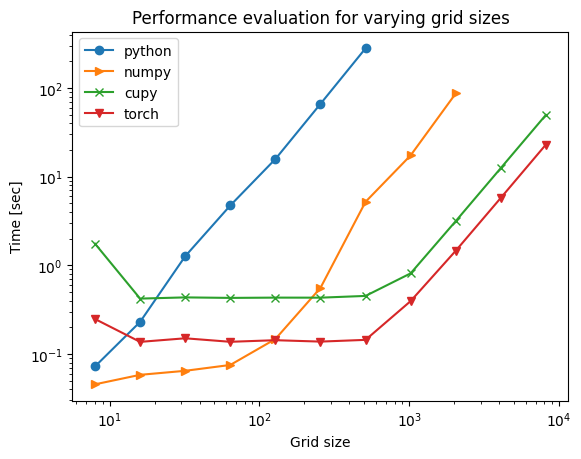

In [14]:
plt.plot(size, duration, linestyle="-", marker="o", label="python")
plt.plot(size_np, duration_np, linestyle="-", marker=">", label="numpy")
plt.plot(size_cp, duration_cp, linestyle="-", marker="x", label="cupy")
plt.plot(size_torch, duration_torch, linestyle="-", marker="v", label="torch")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Grid size")
plt.ylabel("Time [sec]")
plt.title("Performance evaluation for varying grid sizes")

The standard python implementation is by far the slowest. Seconde comes the numpy implementation. They are both executed on the CPU. Cupy and PyTorch which both run on the GPU run much faster. PyTorch in particular utlizes a computational graph and therefore is more efficient. Especially for larger grid sizes the difference in computation time becomes significant.

In [15]:
import h5py

f = h5py.File("gauss_seidel.hdf5", "w")

In [ ]:
x = x.cpu()

f.create_dataset("grid", data=x)